<a href="https://colab.research.google.com/github/Athreya99/Analytics/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle (2).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip  house-prices-advanced-regression-techniques.zip

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('train.csv')


In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


##Preliminary Checks
Preliminary check on the data reveals that it has some columns which have more null values than information,hence these can be ruled out for the training.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [ ]:
df['PoolQC']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1460, dtype: object

There are also many categorical variables in the dataset

In [ ]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

#Correlation
From the heatmap we can see that some of the variables have high correlation with the data, like **Overall Quality,KitchenAbvGr,GarageCars,EnclosedPorch etc** while there are also other variables which barely contribute to the target variable prediction.
We can isolate these variables from the non contributing ones

<AxesSubplot:>

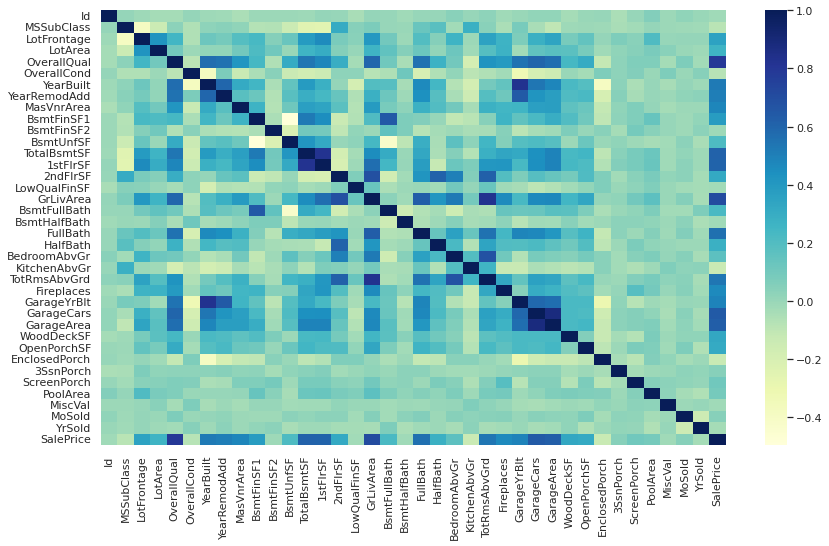

In [ ]:
sns.set(rc={'figure.figsize':(14,8)})
sns.heatmap(df.corr(),cmap="YlGnBu")

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

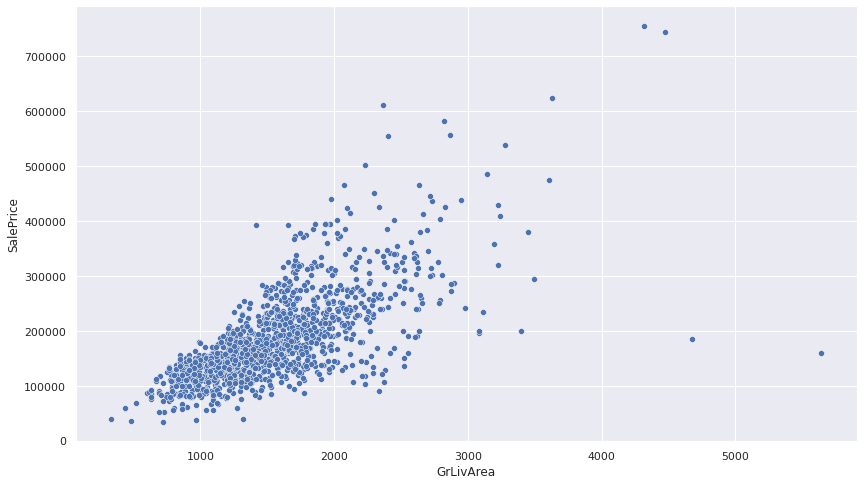

In [ ]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

Int the above graph We can see that there is higher correlation between above Grade Living Area and the Sales price(Higher living area size,higher the sales price)

Sales Price similiar has greater correlation with Above grade kitchen and poarch area.

In the below graph
The overrall quality is based on the overral build and the quiality of the materials used in the house and hence has a greater correlation with the SalesPrice and the range of sales price can be easily determined by the overall quality

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

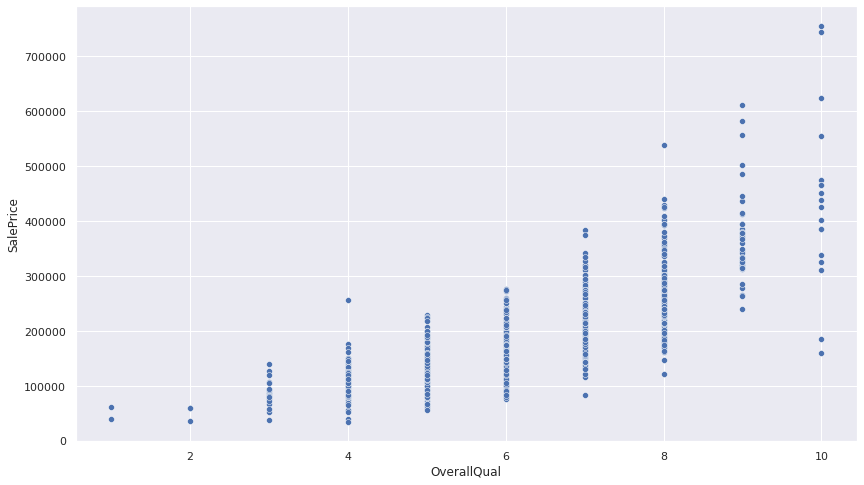

In [ ]:

sns.scatterplot(x='OverallQual', y='SalePrice', data=df)


Since there are a lot of variables (81),we can reduce the dimensions by taking only the columns which have a correlation>0.5 with the target variable 'SalePrice'
We have also taken the categorical variables which are important for the target variable

In [ ]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

In [ ]:
df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856,856,1710,2,8,2,548,208500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,920,920,1786,2,6,2,608,223500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,756,961,1717,1,7,3,642,140000,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


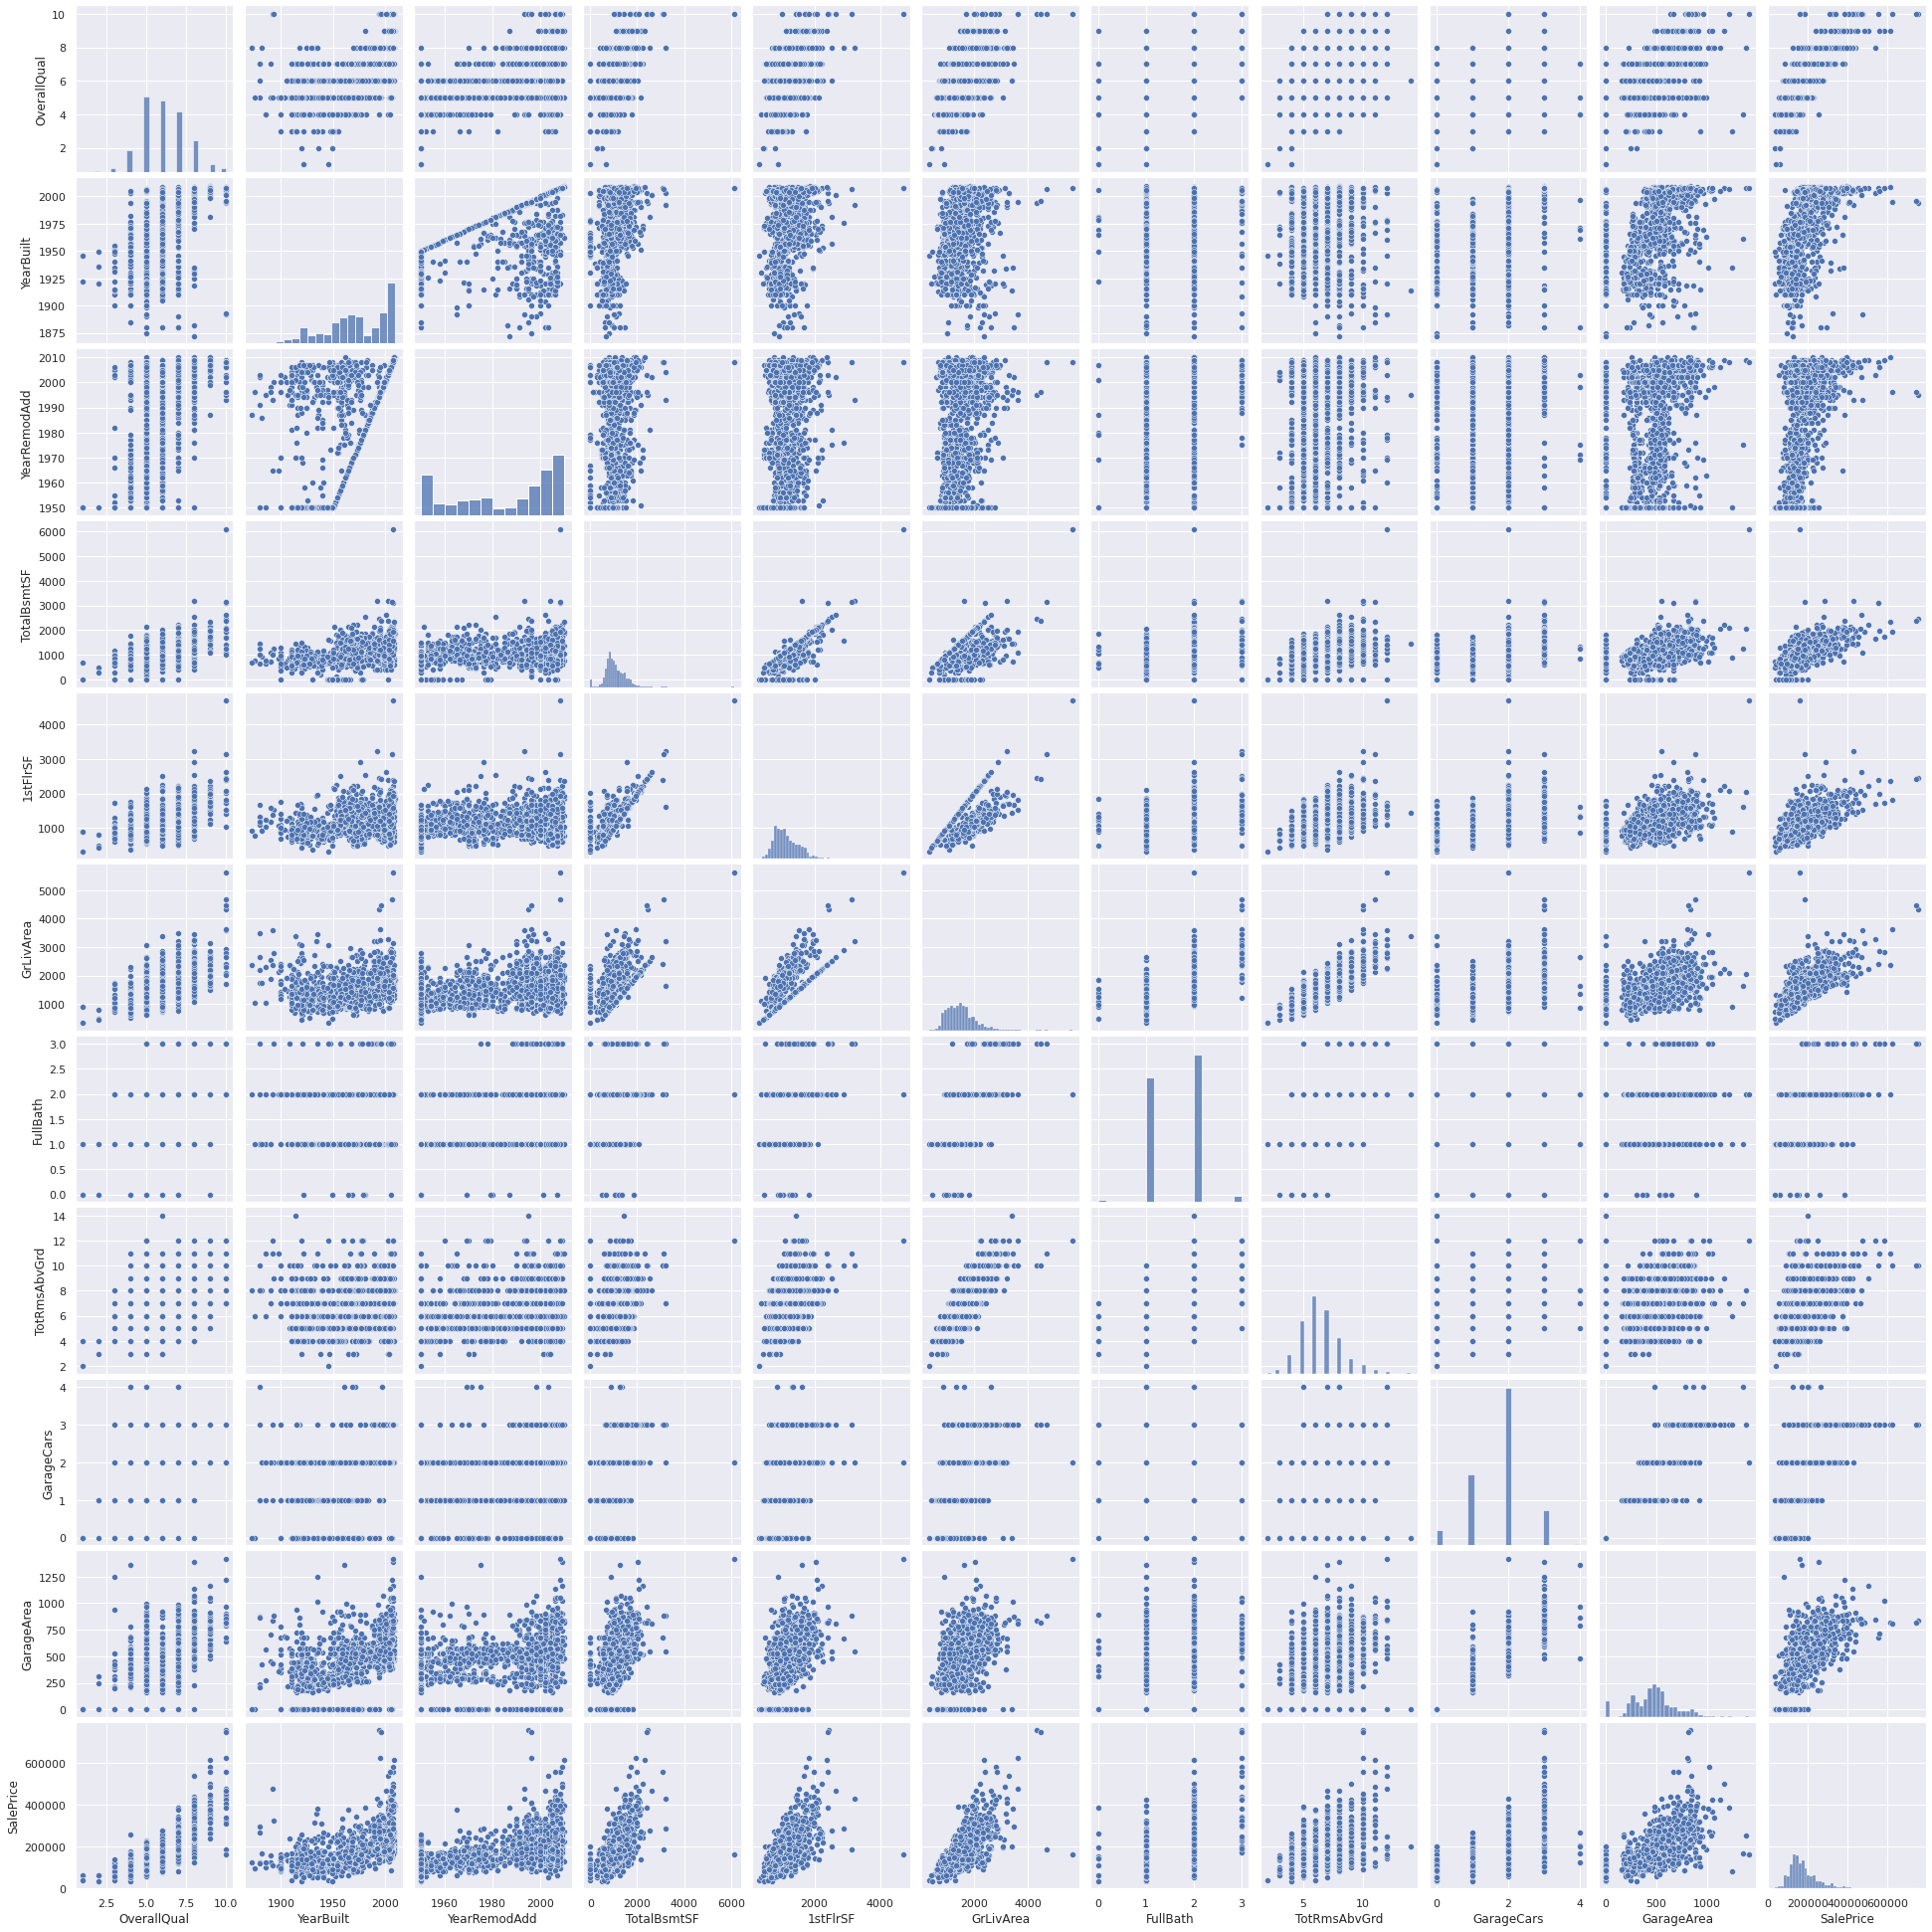

In [ ]:
sns.pairplot(df[important_num_cols])

#Standardising
We have to standardize all the numerical data to bring to the same scale

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[important_num_cols])

StandardScaler()

Label encoding the categorical variables to identify the different classes with corresponding numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in cat_cols:
  df[col]= label_encoder.fit_transform(df[col])

<ipython-input-18-249fad278b63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]= label_encoder.fit_transform(df[col])
<ipython-input-18-249fad278b63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]= label_encoder.fit_transform(df[col])
<ipython-input-18-249fad278b63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

#Machine Learning Models

In [ ]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

Linear Regression

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(X, y)
y_pred=clf.predict(X)

#Performance Metrics
We are using **Mean Absolute Error,Mean Squared Error,Root Mean Squared Error and R2 Score** to measure our models performance on the data


In [ ]:
mae, mse, rmse, r_squared = evaluation(y, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 22170.384229193285
MSE: 1260806079.0661466
RMSE: 35507.831235744976
R2 Score: 0.8000874673371793


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X, y)
y_pred = random_forest.predict(X)

In [ ]:
mae, mse, rmse, r_squared = evaluation(y, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 6951.238317984146
MSE: 125012451.47439818
RMSE: 11180.896720495999
R2 Score: 0.9801781128727222


In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X, y)
y_pred = random_forest.predict(X)

#Reflection
The dataset contains 81 columns out of which many are unecesary for the model.Instead of selecting the variables based on the correlation values,PCA can be applied to get the effective number of dimensions for the model.

---
#Learnings

The sale price predictions depends on various attributes and is highly dependent on Size of the living are,number of rooms above ground,garage size,number of cars the garage can fit,year of sale etc.,

---
#Improvement
Outlier detection can be integrated to detect outliers which are not easy to detect normally.
Other complex models with hyperparameter tuning can be used to get better results

---